In [1]:
import requests
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# http://datalab.naver.com/ca/step1.naver
# 네이버 검색어 트렌드 조회

In [3]:
url = "http://datalab.naver.com/ca/step1/process.naver"
response = requests.post(
    url,
    data={
        "qcType": "N",
        "queryGroups": "Python__SZLIG__Python,파이썬__OUML__Matlab__SZLIG__Matlab,매트랩",
        "startDate": "20160201",
        "endDate": "20170228",
    }
)

In [4]:
data = response.json()

In [5]:
dfs = [
    pd.DataFrame(search_group.get("data"))\
        .set_index("period")\
        .rename(columns={"value": search_group.get("title")})
    for search_group
    in data.get("result")
]

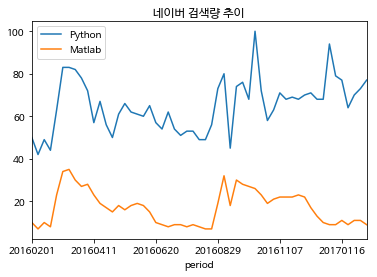

In [6]:
ax = pd.concat(dfs, axis=1).astype("float").plot()
ax.set_title("네이버 검색량 추이")